In [28]:
import numpy as np
import pyproffit
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.modeling.functional_models import Sersic2D
from astropy.modeling.functional_models import Gaussian2D

In [29]:
dat=pyproffit.Data(imglink='C:/Users/ANANDHU/Downloads/modtest_image.fits')

C:\Users\ANANDHU\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


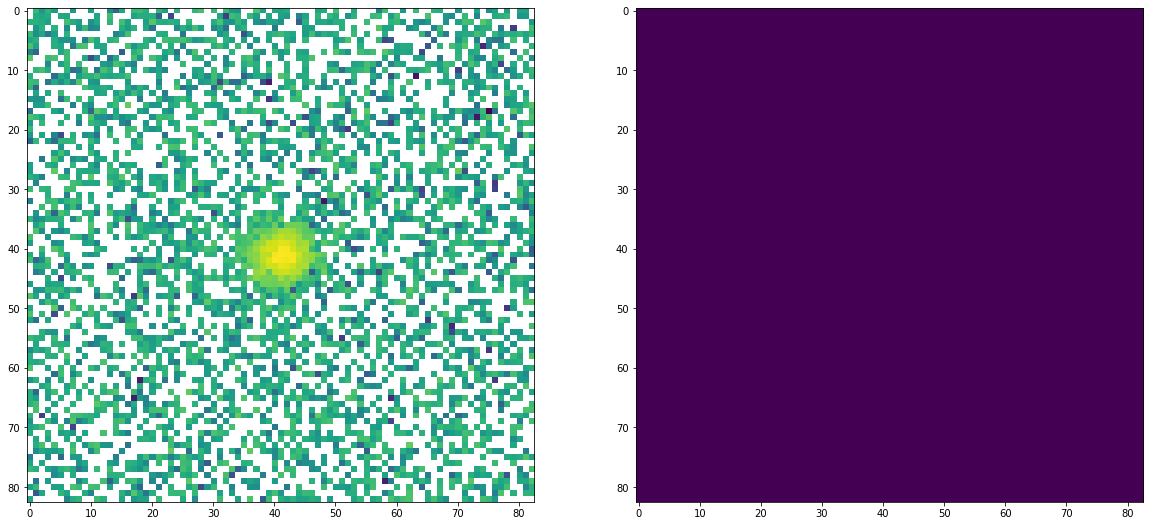

In [30]:
fig = plt.figure(figsize=(20,20))
s1=plt.subplot(221)
plt.imshow(np.log10(dat.img),aspect='auto')
s2=plt.subplot(222)
plt.imshow(dat.exposure,aspect='auto')

In [31]:
dat.dmfilth()

Applying high-pass filter
Interpolating in the masked regions
Filling holes


C:\Users\ANANDHU\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

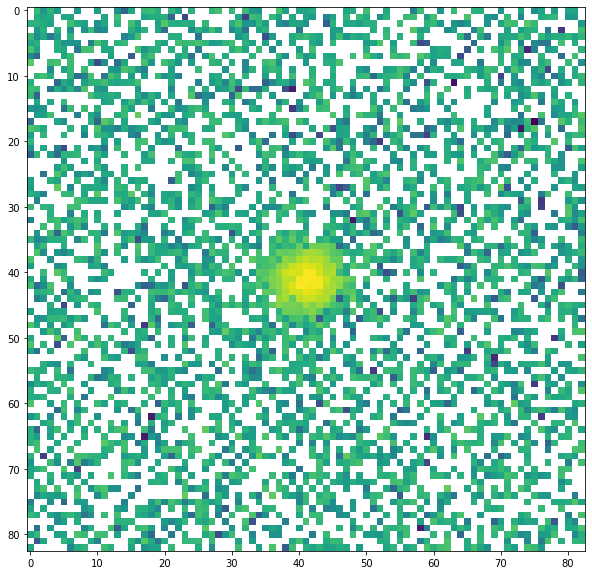

In [32]:
plt.clf()
fig = plt.figure(figsize=(10,10))
plt.imshow(np.log10(dat.filth),aspect='auto')

In [34]:
prof=pyproffit.Profile(dat,center_choice='centroid',maxrad=45.,binsize=20.,centroid_region=30.)

Computing centroid and ellipse parameters using principal component analysis
No approximate center provided, will search for the centroid within a radius of 30 arcmin from the center of the image
Denoising image...
Running PCA...
Centroid position: 42.402144772117964 42.38069705093834
Corresponding FK5 coordinates:  0.03956032171581825 0.03595710455764056
Ellipse axis ratio and position angle: 1.0179910949654611 96.65089661156283


In [35]:
prof.SBprofile(ellipse_ratio=prof.ellratio,rotation_angle=prof.ellangle+180.)

<Figure size 432x288 with 0 Axes>

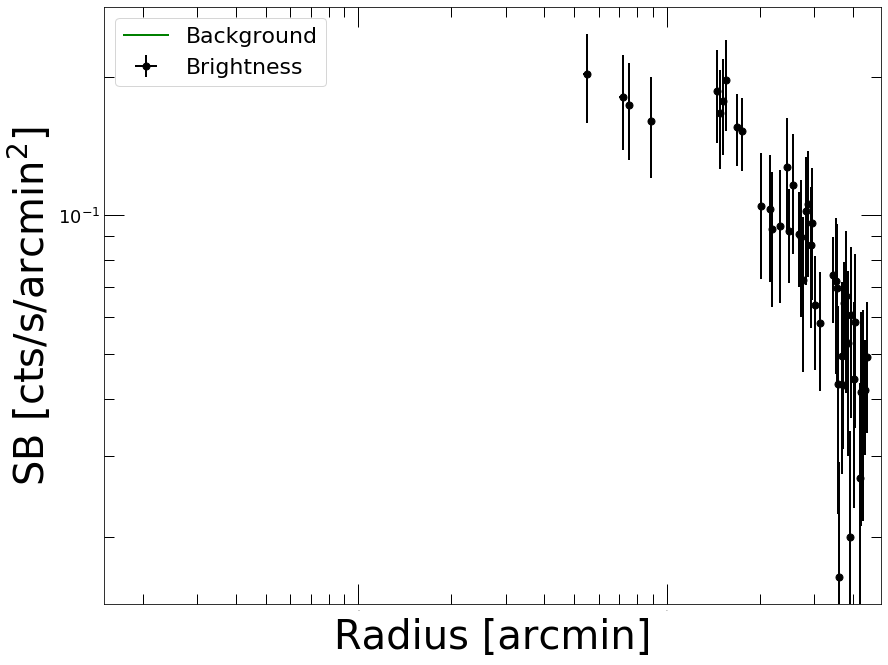

In [36]:
prof.Plot()

In [37]:
mod=pyproffit.Model(pyproffit.BetaModel)

In [38]:
mod.parnames

('beta', 'rc', 'norm', 'bkg')

In [39]:
fitobj=pyproffit.Fitter(model=mod, profile=prof, beta=0.7, rc=2.,norm=-2,bkg=-4)

fitobj.Migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 26.35                      │              Nfcn = 880              │
│ EDM = 4.04e-09 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│INVALID Minimum│ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │   Hesse FAILED   │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼─────────

C:\Users\ANANDHU\anaconda3\lib\site-packages\pyproffit\profextract.py:945: RuntimeWarning: divide by zero encountered in true_divide
  chi = (self.profile-tmod)/self.eprof


<Figure size 432x288 with 0 Axes>

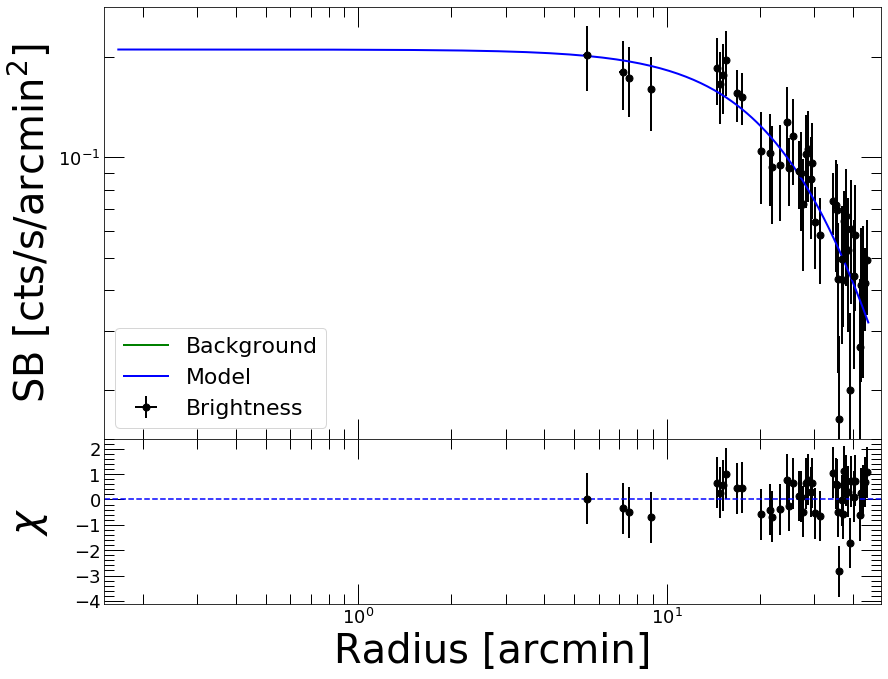

In [40]:
prof.Plot(model=mod)

In [49]:
myModel = models.Sersic2D
cuspmod = pyproffit.Model(myModel)

AttributeError: type object 'Sersic2D' has no attribute '__code__'

In [51]:
fitcusp = pyproffit.Fitter(model=myModel, profile=prof, (amplitude = 1, r_eff = 25, n=4, x_0=50, y_0=50,
               ellip=.5, theta=-1)
fitcusp.Migrad()

SyntaxError: invalid syntax (<ipython-input-51-c6935924daae>, line 1)

AttributeError: type object 'Sersic2D' has no attribute 'model'

<Figure size 432x288 with 0 Axes>

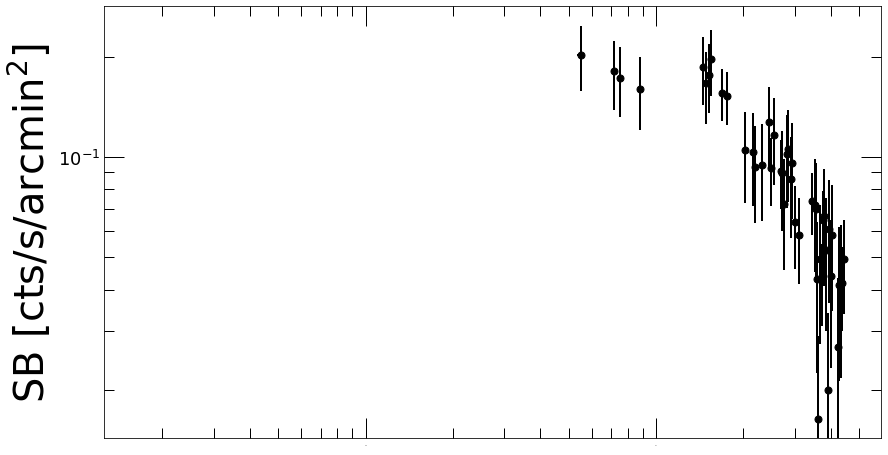

In [52]:
prof.Plot(model=myModel)